In [1]:
import pandas as pd
sess = pd.read_csv("Clustered_Session.csv")

In [3]:
sess

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLUSTER
0,5873599,8641867,9,82.0,1890,mobile,"buy,search",4
1,5873599,6616320,21,105.0,1604,mobile,"buy,search",4
2,5873599,5886172,40,41.0,632,mobile,"buy,search",0
3,5873884,1050889,15,160.0,1035,mobile,"buy,search",3
4,5874461,10298270,5,13.0,298,mobile,buy,0
...,...,...,...,...,...,...,...,...
2698691,3500464,8713975,308,71.0,423,mobile,buy,0
2698692,3501155,4636571,86,44.0,2090,desktop,"buy,search",4
2698693,3501397,582632,128,164.0,2435,mobile,buy,4
2698694,3573271,2328407,9,5.0,986,desktop,buy,3


In [2]:
cus = pd.read_csv("04.Custom.csv")
cus

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30
...,...,...,...
671674,3725302,F,40
671675,3725462,M,40
671676,3725818,F,30
671677,3661812,F,30


In [3]:
data = pd.merge(sess, cus, left_on='CLNT_ID', right_on='CLNT_ID', how='left')
data.shape
data

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLUSTER,CLNT_GENDER,CLNT_AGE
0,5873599,8641867,9,82.0,1890,mobile,"buy,search",4,F,20.0
1,5873599,6616320,21,105.0,1604,mobile,"buy,search",4,F,20.0
2,5873599,5886172,40,41.0,632,mobile,"buy,search",0,F,20.0
3,5873884,1050889,15,160.0,1035,mobile,"buy,search",3,F,30.0
4,5874461,10298270,5,13.0,298,mobile,buy,0,F,20.0
...,...,...,...,...,...,...,...,...,...,...
2698691,3500464,8713975,308,71.0,423,mobile,buy,0,M,20.0
2698692,3501155,4636571,86,44.0,2090,desktop,"buy,search",4,NaN,NaN
2698693,3501397,582632,128,164.0,2435,mobile,buy,4,F,30.0
2698694,3573271,2328407,9,5.0,986,desktop,buy,3,NaN,NaN


In [4]:
data = data.dropna()
data

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLUSTER,CLNT_GENDER,CLNT_AGE
0,5873599,8641867,9,82.0,1890,mobile,"buy,search",4,F,20.0
1,5873599,6616320,21,105.0,1604,mobile,"buy,search",4,F,20.0
2,5873599,5886172,40,41.0,632,mobile,"buy,search",0,F,20.0
3,5873884,1050889,15,160.0,1035,mobile,"buy,search",3,F,30.0
4,5874461,10298270,5,13.0,298,mobile,buy,0,F,20.0
...,...,...,...,...,...,...,...,...,...,...
2698687,3492307,2983998,25,29.0,419,mobile,"buy,search",0,M,30.0
2698689,3490918,1573185,16,50.0,1546,mobile,buy,4,F,20.0
2698690,3494680,9458833,488,29.0,237,mobile,buy,0,F,30.0
2698691,3500464,8713975,308,71.0,423,mobile,buy,0,M,20.0


In [5]:
data2 = data.drop(['CLNT_ID','SESS_ID','SESS_SEQ','CLUSTER'], axis=1)
data2

,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLNT_GENDER,CLNT_AGE
0,82.0,1890,mobile,"buy,search",F,20.0
1,105.0,1604,mobile,"buy,search",F,20.0
2,41.0,632,mobile,"buy,search",F,20.0
3,160.0,1035,mobile,"buy,search",F,30.0
4,13.0,298,mobile,buy,F,20.0
...,...,...,...,...,...,...
2698687,29.0,419,mobile,"buy,search",M,30.0
2698689,50.0,1546,mobile,buy,F,20.0
2698690,29.0,237,mobile,buy,F,30.0
2698691,71.0,423,mobile,buy,M,20.0


## 범주형 데이터 숫자로

In [6]:
from sklearn.preprocessing import LabelEncoder
##
encode = data2

encode_DVC = LabelEncoder()
encode_DVC.fit(data2['DVC_CTG_NM'])

encode['DVC_CTG_NM'] = encode_DVC.transform(data2['DVC_CTG_NM'])

encode_ACT = LabelEncoder()
encode_ACT.fit(data2['CLNT_GENDER'])

encode['CLNT_GENDER'] = encode_ACT.transform(data2['CLNT_GENDER'])
##
encode_ACT = LabelEncoder()
encode_ACT.fit(data2['ACTION'])

encode['ACTION'] = encode_ACT.transform(data2['ACTION'])

encode.tail()

,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLNT_GENDER,CLNT_AGE
2698687,29.0,419,1,1,1,30.0
2698689,50.0,1546,1,0,0,20.0
2698690,29.0,237,1,0,0,30.0
2698691,71.0,423,1,0,1,20.0
2698693,164.0,2435,1,0,0,30.0


female = 0, male=1

In [9]:
cols = ['DVC_CTG_NM','CLNT_GENDER','CLNT_AGE']
data = encode[cols]
data.head()

,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE
0,1,0,20.0
1,1,0,20.0
2,1,0,20.0
3,1,0,30.0
4,1,0,20.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, 
                                encode[['ACTION']], test_size=0.1, random_state=13)

In [11]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.5172077764532326


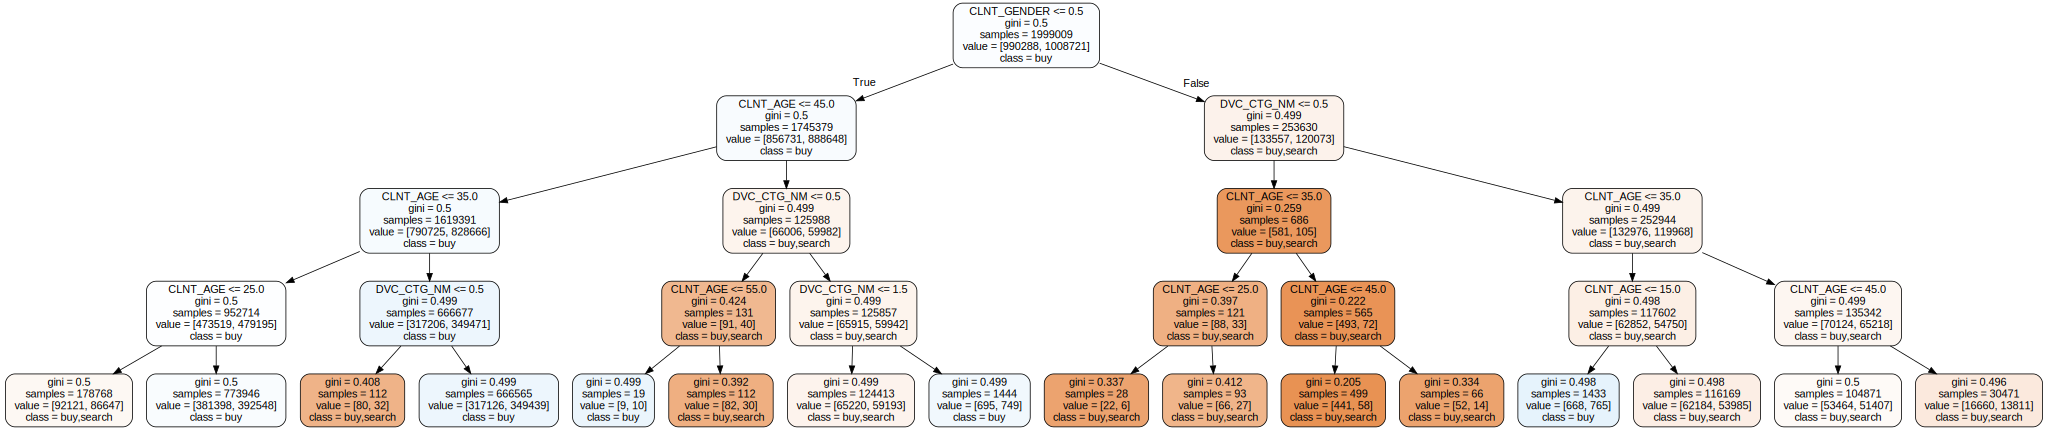

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="LPoint.dot",
        feature_names=['DVC_CTG_NM','CLNT_GENDER','CLNT_AGE'],
        class_names=['buy,search','buy'],
        rounded=True,
        filled=True
    )

import graphviz

with open("LPoint.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='purchase_tree', directory='./', cleanup=True)
dot

In [2]:
import pandas as pd

### 클러스터별 구매재품군 보기

In [1]:
import pandas as pd
data = pd.read_csv("Clustered_Session.csv")
prod = pd.read_csv("01.Pruduct.csv")

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print(data.head())
print(prod.head())

   CLNT_ID   SESS_ID  SESS_SEQ  TOT_PAG_VIEW_CT  TOT_SESS_HR_V DVC_CTG_NM  \
0  5873599   8641867         9             82.0           1890     mobile   
1  5873599   6616320        21            105.0           1604     mobile   
2  5873599   5886172        40             41.0            632     mobile   
3  5873884   1050889        15            160.0           1035     mobile   
4  5874461  10298270         5             13.0            298     mobile   

       ACTION  CLUSTER  
0  buy,search        4  
1  buy,search        4  
2  buy,search        0  
3  buy,search        3  
4         buy        0  
   CLNT_ID   SESS_ID  HITS_SEQ    PD_C                         PD_ADD_NM  \
0  4139680   7605037        12  642112                           색상:워터멜론   
1  4140076  10189797        13  570603  색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개   
2  4142395   6158159        85  179538                         (not set)   
3  4144914   7935714        12  554336      색상:블랙|사이즈:160cm(12~13세) / 1개   
4  4144

In [7]:
buydata = data.drop(['CLNT_ID','SESS_SEQ','TOT_PAG_VIEW_CT','TOT_SESS_HR_V','DVC_CTG_NM','CLUSTER'],axis=1)

In [8]:
buydata
#buydata.to_csv("ACTIONONLY.csv")

,SESS_ID,ACTION
0,8641867,"buy,search"
1,6616320,"buy,search"
2,5886172,"buy,search"
3,1050889,"buy,search"
4,10298270,buy
...,...,...
2698691,8713975,buy
2698692,4636571,"buy,search"
2698693,582632,buy
2698694,2328407,buy


In [2]:
product = prod.drop(['CLNT_ID','HITS_SEQ'],axis = 1)
product

,SESS_ID,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,7605037,642112,색상:워터멜론,[바비브라운],"39,000",1
1,10189797,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,6158159,179538,(not set),[아베다],"39,000",1
3,7935714,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,6406509,190306,5개,데코르테,"39,000",5
...,...,...,...,...,...,...
5024901,10042817,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),"39,000",1
5024902,7272433,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024903,7946785,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024904,5355187,840639,사이즈:Medium / 1개,배럴,"39,000",1


In [ ]:
### 한번에 많이 사는 제품 보기

In [10]:
df = pd.merge(buydata, product, left_on='SESS_ID', right_on='SESS_ID', how='left')

In [11]:
print(df.isnull().sum())

SESS_ID      0
ACTION       0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64


In [12]:
df

,SESS_ID,ACTION,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,8641867,"buy,search",370753,색상:선택(04) 기본체크 4번 세트 / 1개,닥스(손수건),"20,000",1
1,8641867,"buy,search",370753,색상:선택(09) 81번 세트 / 1개,닥스(손수건),"20,000",1
2,8641867,"buy,search",370753,색상:선택(10) 82번 세트 / 1개,닥스(손수건),"20,000",1
3,6616320,"buy,search",659005,색상:2호 / 1개,조르지오 아르마니,"89,000",1
4,5886172,"buy,search",809194,색상:리질리언트 루즈 / 1개,맥,"34,000",1
...,...,...,...,...,...,...,...
6157812,582632,buy,24629,색상:블랙|사이즈:FF / 1개,매그제이(MAGJAY),"99,000",1
6157813,582632,buy,50660,색상:베이지|사이즈:FF / 1개,매그제이(MAGJAY),"22,000",1
6157814,2328407,buy,202446,색상:블랙,[라코스테],"99,000",1
6157815,8702345,buy,384335,색상:화이트/사이즈:100,[헨리코튼],"45,000",1


In [13]:
df= df.drop(['PD_BUY_AM','PD_BUY_CT'],axis=1)
df[:3]

,SESS_ID,ACTION,PD_C,PD_ADD_NM,PD_BRA_NM
0,8641867,"buy,search",370753,색상:선택(04) 기본체크 4번 세트 / 1개,닥스(손수건)
1,8641867,"buy,search",370753,색상:선택(09) 81번 세트 / 1개,닥스(손수건)
2,8641867,"buy,search",370753,색상:선택(10) 82번 세트 / 1개,닥스(손수건)


In [13]:
mast = pd.read_csv("06.Master.csv")

한 ID 에 중복되거나 다른상품을 사는경우가 있는데 이는 무시하기로 함,, 어차피 지금은 행동별 제품군을 체크하기 위함이니까..!

In [15]:
data = pd.merge(mast, df, left_on='PD_C', right_on='PD_C', how='left')
data.shape

(6158109, 9)

In [16]:
data.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,SESS_ID,ACTION,PD_ADD_NM,PD_BRA_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,2330751.0,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)
1,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,2330751.0,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)
2,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,2330751.0,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)
3,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,2330751.0,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)
4,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,2659813.0,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)


In [18]:
ddata = data.drop(['CLAC2_NM','SESS'], axis=1)
ddata[:3]

,PD_C,PD_NM,CLAC1_NM,CLAC3_NM,ACTION,PD_ADD_NM,PD_BRA_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성스포츠티셔츠,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)
1,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성스포츠티셔츠,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)
2,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성스포츠티셔츠,"buy,search",색상:블랙|사이즈:MD[95] / 1개,언더아머(스포츠)


In [ ]:
#data.to_csv("ActionByProduct.csv")

## 각각 단순구매와 검색구매를 나누어 순위를 확인할것이다!

In [2]:
#data.head()

,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,PD_BRA_NM,PD_BUY_CT
0,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,buy,언더아머(스포츠),1
1,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,"buy,search",언더아머(스포츠),1
2,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,"buy,search",언더아머(스포츠),1
3,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,"buy,search",언더아머(스포츠),1
4,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,"buy,search",언더아머(스포츠),1


In [19]:
buy_filter = ddata['ACTION']=='buy'
print(ddata[buy_filter])

buysearch_filter = ddata['ACTION']=='buy,search'
print(ddata[buysearch_filter])

           PD_C                                              PD_NM   CLAC1_NM  \
6         62282                         여자 플라워덧신 2족선물세트 17403-2set  속옷/양말/홈웨어   
8         61537            닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)       패션잡화   
11        58820  여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...       남성의류   
12        58820  여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...       남성의류   
13        58820  여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...       남성의류   
...         ...                                                ...        ...   
6158097  410356       별 패턴 실크 스카프 ATSC8E100 - P2(핑크) / 5X84(가로X세로)       패션잡화   
6158098  409376  팝바니 키즈 하트 스트라이프 클래식 티셔츠 화이트 - 팝바니키즈하트스트클래식티셔츠/...      유아동의류   
6158102  400721  [피핀] 클레르 박스 롱티셔츠 103764 - ivory / FREE ◈85564075◈       여성의류   
6158104  400197                  섀르반 올인원 수영복 (K14D5DM231) - BL/110      시즌스포츠   
6158108  306289                클라이마쿨 쇼츠 [CX3564] - CX3564(그레이) / M      스포츠패션   

          CLAC3_NM ACTION  

## 단순구매의 경우 순위

In [20]:
buy_data = ddata[buy_filter]
bsearch_data = ddata[buysearch_filter]

In [21]:

buydata = buy_data['PD_C']
buydata

6           62282
8           61537
11          58820
12          58820
13          58820
            ...  
6158097    410356
6158098    409376
6158102    400721
6158104    400197
6158108    306289
Name: PD_C, Length: 2604535, dtype: int64

In [22]:
cnt = {}

for data in buydata:
    try: cnt[data] +=1
    except: cnt[data] = 1

In [23]:
cnt

{62282: 1,
 61537: 1,
 58820: 3,
 58280: 2,
 58183: 2,
 58098: 2,
 58057: 3,
 56306: 1,
 55076: 2,
 318122: 2,
 317956: 3,
 127096: 1,
 125372: 2,
 124084: 1,
 123395: 2,
 123233: 1,
 122845: 1,
 209216: 7,
 216029: 2,
 214635: 1,
 213856: 1,
 213204: 1,
 213185: 1,
 209786: 1,
 206498: 1,
 202585: 1,
 262880: 1,
 255793: 1,
 316695: 1,
 316577: 11,
 312035: 1,
 311385: 1,
 306459: 2,
 237368: 2,
 236664: 2,
 119241: 3,
 115986: 2,
 115913: 1,
 111192: 6,
 109061: 1,
 392764: 1,
 392707: 5,
 269637: 1,
 269117: 7,
 263707: 1,
 261189: 1,
 260721: 1,
 342186: 4,
 340646: 3,
 339896: 3,
 337277: 3,
 333712: 2,
 331633: 1,
 440655: 1,
 439396: 2,
 439375: 13,
 437353: 1,
 455491: 4,
 454332: 1,
 450785: 2,
 445643: 1,
 270447: 1,
 320123: 4,
 420708: 1,
 416597: 8,
 416457: 7,
 255530: 1,
 253913: 2,
 252325: 1,
 384894: 1,
 426961: 1,
 223352: 1,
 219971: 3,
 218036: 1,
 262839: 1,
 247004: 3,
 244918: 1,
 243270: 4,
 241840: 2,
 240341: 4,
 411754: 1,
 406760: 3,
 297774: 5,
 295445: 1,

In [24]:
## 딕셔너리로 정렬하기
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)

In [25]:
print(cntsort[:10])

[(753343, 6715), (755981, 3404), (748308, 3270), (622881, 2636), (692709, 2603), (706924, 2579), (1965, 2514), (768597, 2372), (380539, 2343), (839528, 2131)]


In [26]:
info = ddata.drop(['ACTION'],axis=1)

In [27]:
data1 = info[info['PD_C'] == 380539 ]
data2 = info[info['PD_C'] == 622881 ]
data3 = info[info['PD_C'] == 759894 ]
data4 = info[info['PD_C'] == 559754 ]
data5 = info[info['PD_C'] == 365667 ]
data6 = info[info['PD_C'] == 247522 ]
data7 = info[info['PD_C'] == 1965 ]
data8 = info[info['PD_C'] == 555551 ]
data9 = info[info['PD_C'] == 581894 ]
data10 = info[info['PD_C'] == 207981 ]

data1 = data1[:1]
data1
data2 = data2[:1]
data3 = data3[:1]
data4 = data4[:1]
data5 = data5[:1]
data6 = data6[:1]
data7 = data7[:1]
data8 = data8[:1]
data9 = data9[:1]
data10 = data10[:1]


In [28]:
rank = data1
rank

,PD_C,PD_NM,CLAC1_NM,CLAC3_NM,PD_ADD_NM,PD_BRA_NM
4271827,380539,여성 브이넥 반소매 티셔츠 TFMS1KOE65D0 - N00(화이트) / M,여성의류,여성티셔츠/탑,색상:N00(화이트)/사이즈:M,[타미힐피거여성]


In [29]:
rank = rank.append(data2)
rank = rank.append(data3)
rank = rank.append(data4)
rank = rank.append(data5)
rank = rank.append(data6)
rank = rank.append(data7)
rank = rank.append(data8)
rank = rank.append(data9)
rank = rank.append(data10)

In [30]:
rank

,PD_C,PD_NM,CLAC1_NM,CLAC3_NM,PD_ADD_NM,PD_BRA_NM
4271827,380539,여성 브이넥 반소매 티셔츠 TFMS1KOE65D0 - N00(화이트) / M,여성의류,여성티셔츠/탑,색상:N00(화이트)/사이즈:M,[타미힐피거여성]
3975788,622881,[선미 공항패션]Taylor mini O5NBCB08_PW - BLACK,패션잡화,여성토트백,COLOR:CREAM / 1개,오야니(가방)
4821796,759894,테일러 MID(Taylor MID)O6FBCB22_PB - CREAM,패션잡화,여성숄더백,COLOR:CREAM / 1개,오야니
2249310,559754,여성 베이직 스트라이프 크루넥 티셔츠 TUNS1KOE23D0 - 멀티핑크(N29) / M,남성의류,남성티셔츠,색상:라이트블루(N27)/사이즈:M,[타미진]
3524755,365667,[LAP] #핫한반팔T 모음 18종택1(LAP_0416) - 14_AJGWT039_...,여성의류,여성티셔츠/탑,색상:06_AJGWT021_CH|사이즈:F / 1개,랩
772696,247522,여성 슬림핏 플래그 피케 티셔츠 (TFMS1KTE60D0) - 그린(G30) / L...,여성의류,여성티셔츠/탑,색상:블루(B40)|사이즈:S(55) / 1개,타미힐피거여성
3274622,1965,홍삼정 에브리타임(10mlx30포) / 롯데백화점 본점 출고 / 정관장,건강식품,홍삼액,1개,정관장
6144346,555551,[COURONNE] Selena(셀레나) Shoulder_RCBSX18213BKX ...,패션잡화,여성숄더백,사이즈:XXX,[쿠론]
1153207,581894,봄메탈사양말2 JSSC302C - 블루 / FREE,속옷/양말/홈웨어,여성일반양말,색상:블루|사이즈:FREE / 1개,쥬시쥬디
884127,207981,D (여) 심플베이직덧신 스킨 - (여)스킨,속옷/양말/홈웨어,여성덧신류,색상:(여)스킨,[올삭스]


In [29]:
#rank.reset_index()

## 비교구매 순위!

In [31]:
bsearch = bsearch_data['PD_C']
bsearch

0           64382
1           64382
2           64382
3           64382
4           64382
            ...  
6158101    400890
6158103    400382
6158105    400197
6158106    399225
6158107    399225
Name: PD_C, Length: 3553282, dtype: int64

In [32]:
cnt = {}

for dd in bsearch:
    try: cnt[dd] +=1
    except: cnt[dd] = 1

In [33]:
cnt

{64382: 6,
 61729: 1,
 61537: 2,
 58183: 1,
 318011: 4,
 317956: 4,
 124084: 1,
 122845: 1,
 210546: 1,
 209216: 23,
 216029: 4,
 213856: 1,
 213204: 2,
 213185: 2,
 209786: 1,
 201823: 1,
 266521: 1,
 266015: 2,
 255793: 2,
 180483: 3,
 180482: 1,
 316577: 9,
 312733: 2,
 312035: 1,
 306459: 3,
 236664: 11,
 115120: 1,
 112387: 2,
 111192: 5,
 109858: 1,
 109817: 3,
 109061: 1,
 24522: 4,
 19895: 1,
 18043: 1,
 15370: 1,
 10841: 2,
 392764: 2,
 392752: 2,
 392707: 3,
 390918: 2,
 390776: 1,
 389861: 4,
 269637: 1,
 269117: 11,
 263707: 4,
 261189: 4,
 260721: 3,
 258646: 1,
 342186: 5,
 340646: 2,
 337631: 7,
 337277: 4,
 333712: 2,
 332807: 1,
 331949: 2,
 440201: 1,
 439396: 1,
 439375: 3,
 455494: 1,
 454332: 12,
 451908: 1,
 450785: 3,
 447372: 2,
 447017: 3,
 443453: 3,
 442458: 1,
 442146: 2,
 272178: 1,
 271781: 2,
 270635: 1,
 320988: 1,
 320123: 12,
 311334: 2,
 416597: 4,
 416457: 6,
 255722: 2,
 255530: 1,
 252325: 1,
 387435: 2,
 384894: 1,
 382813: 2,
 432475: 2,
 430753:

In [34]:
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)
print(cntsort[40:46])

[(1955, 10261), (803165, 10243), (585568, 10231), (737770, 10206), (325662, 10155), (559754, 10146)]


In [34]:
data1 = info[info['PD_C'] == 1965 ]
data2 = info[info['PD_C'] == 678377 ]
data3 = info[info['PD_C'] == 380539 ]
data4 = info[info['PD_C'] == 365667 ]
data5 = info[info['PD_C'] == 50185 ]
data6 = info[info['PD_C'] == 718416 ]
data7 = info[info['PD_C'] == 759894 ]
data8 = info[info['PD_C'] == 622881 ]
data9 = info[info['PD_C'] == 748308 ]
data10 = info[info['PD_C'] == 554713 ]

data1 = data1[:1]
data2 = data2[:1]
data3 = data3[:1]
data4 = data4[:1]
data5 = data5[:1]
data6 = data6[:1]
data7 = data7[:1]
data8 = data8[:1]
data9 = data9[:1]
data10 = data10[:1]

In [35]:
rank = data1
rank = rank.append(data2)
rank = rank.append(data3)
rank = rank.append(data4)
rank = rank.append(data5)
rank = rank.append(data6)
rank = rank.append(data7)
rank = rank.append(data8)
rank = rank.append(data9)
rank = rank.append(data10)

In [36]:
rank.reset_index()

,index,PD_C,PD_NM,CLAC1_NM,CLAC3_NM,PD_ADD_NM,PD_BRA_NM
0,3274622,1965,홍삼정 에브리타임(10mlx30포) / 롯데백화점 본점 출고 / 정관장,건강식품,홍삼액,1개,정관장
1,4379064,678377,네이키드 히트 팔레트,화장품/뷰티케어,아이섀도우,1개,어반디케이
2,4271827,380539,여성 브이넥 반소매 티셔츠 TFMS1KOE65D0 - N00(화이트) / M,여성의류,여성티셔츠/탑,색상:N00(화이트)/사이즈:M,[타미힐피거여성]
3,3524755,365667,[LAP] #핫한반팔T 모음 18종택1(LAP_0416) - 14_AJGWT039_...,여성의류,여성티셔츠/탑,색상:06_AJGWT021_CH|사이즈:F / 1개,랩
4,3489866,50185,[G]자음 기초2종 기획세트(+상품권1만원증정) - 세트/,화장품/뷰티케어,스킨케어세트,타입:세트/ / 1개,설화수
5,2840124,718416,홍삼정 240g 롯데백화점 본점 출고 / 정관장,건강식품,홍삼액,(not set),[정관장]
6,4821796,759894,테일러 MID(Taylor MID)O6FBCB22_PB - CREAM,패션잡화,여성숄더백,COLOR:CREAM / 1개,오야니
7,3975788,622881,[선미 공항패션]Taylor mini O5NBCB08_PW - BLACK,패션잡화,여성토트백,COLOR:CREAM / 1개,오야니(가방)
8,2859953,748308,립스틱 - 온 홀드,화장품/뷰티케어,립스틱/립라이너,색상:릴렌트리슬리 레드 / 1개,맥
9,3913515,554713,3D 지비츠 - 크록스악세사리 - 01.흰고래-꼬리,출산/육아용품,출산/신생아용품세트,선택:23.자동차 / 1개,플레이비츠


## 기기별 순위

In [4]:
sess = pd.read_csv("Clustered_Session.csv")
sess[:3]

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ACTION,CLUSTER
0,5873599,8641867,9,82.0,1890,mobile,"buy,search",4
1,5873599,6616320,21,105.0,1604,mobile,"buy,search",4
2,5873599,5886172,40,41.0,632,mobile,"buy,search",0


In [5]:
sess = sess.drop(['SESS_SEQ','TOT_SESS_HR_V','TOT_PAG_VIEW_CT','ACTION','CLUSTER'],axis=1)

In [6]:
sess.head()

,CLNT_ID,SESS_ID,DVC_CTG_NM
0,5873599,8641867,mobile
1,5873599,6616320,mobile
2,5873599,5886172,mobile
3,5873884,1050889,mobile
4,5874461,10298270,mobile


In [7]:
product = pd.read_csv("01.Pruduct.csv")
product[:3]

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1


In [8]:
custom = pd.read_csv("04.Custom.csv")
custom[:3]

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30


In [9]:
product = product.drop(['PD_BUY_CT','HITS_SEQ','PD_BUY_AM'],axis=1)
product[:3]

,CLNT_ID,SESS_ID,PD_C,PD_ADD_NM,PD_BRA_NM
0,4139680,7605037,642112,색상:워터멜론,[바비브라운]
1,4140076,10189797,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트
2,4142395,6158159,179538,(not set),[아베다]


In [10]:
predevice = pd.merge(custom, product,left_on='CLNT_ID', right_on='CLNT_ID', how='left')
predevice[:3]

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,PD_C,PD_ADD_NM,PD_BRA_NM
0,4830726,F,30,2546785,357970,1개,에스까다(선글라스)
1,4830726,F,30,2546785,357970,1개,에스까다(선글라스)
2,4830874,F,40,1456881,81976,색상:버건디(90)|사이즈:S(90/66) / 1개,유닛


In [11]:
device = pd.merge(sess, predevice, left_on='SESS_ID', right_on='SESS_ID', how='left')
device[:3]

,CLNT_ID_x,SESS_ID,DVC_CTG_NM,CLNT_ID_y,CLNT_GENDER,CLNT_AGE,PD_C,PD_ADD_NM,PD_BRA_NM
0,5873599,8641867,mobile,5873599.0,F,20.0,370753.0,색상:선택(04) 기본체크 4번 세트 / 1개,닥스(손수건)
1,5873599,8641867,mobile,5873599.0,F,20.0,370753.0,색상:선택(09) 81번 세트 / 1개,닥스(손수건)
2,5873599,8641867,mobile,5873599.0,F,20.0,370753.0,색상:선택(10) 82번 세트 / 1개,닥스(손수건)


In [14]:
ddf = pd.merge(device, mast, left_on='PD_C', right_on='PD_C', how='left')
ddf[:3]

,CLNT_ID_x,SESS_ID,DVC_CTG_NM,CLNT_ID_y,CLNT_GENDER,CLNT_AGE,PD_C,PD_ADD_NM,PD_BRA_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,5873599,8641867,mobile,5873599.0,F,20.0,370753.0,색상:선택(04) 기본체크 4번 세트 / 1개,닥스(손수건),남녀 손수건 2매세트 25종 택 1 - 선택(04) 기본체크 4번 세트,패션잡화,패션액세서리,손수건
1,5873599,8641867,mobile,5873599.0,F,20.0,370753.0,색상:선택(09) 81번 세트 / 1개,닥스(손수건),남녀 손수건 2매세트 25종 택 1 - 선택(04) 기본체크 4번 세트,패션잡화,패션액세서리,손수건
2,5873599,8641867,mobile,5873599.0,F,20.0,370753.0,색상:선택(10) 82번 세트 / 1개,닥스(손수건),남녀 손수건 2매세트 25종 택 1 - 선택(04) 기본체크 4번 세트,패션잡화,패션액세서리,손수건


In [17]:
ddf = ddf.drop(['CLNT_ID_x','CLNT_ID_y','CLAC2_NM'], axis=1)
ddf[:3]

,SESS_ID,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,PD_C,PD_ADD_NM,PD_BRA_NM,PD_NM,CLAC1_NM,CLAC3_NM
0,8641867,mobile,F,20.0,370753.0,색상:선택(04) 기본체크 4번 세트 / 1개,닥스(손수건),남녀 손수건 2매세트 25종 택 1 - 선택(04) 기본체크 4번 세트,패션잡화,손수건
1,8641867,mobile,F,20.0,370753.0,색상:선택(09) 81번 세트 / 1개,닥스(손수건),남녀 손수건 2매세트 25종 택 1 - 선택(04) 기본체크 4번 세트,패션잡화,손수건
2,8641867,mobile,F,20.0,370753.0,색상:선택(10) 82번 세트 / 1개,닥스(손수건),남녀 손수건 2매세트 25종 택 1 - 선택(04) 기본체크 4번 세트,패션잡화,손수건


In [53]:
#ddf.to_csv("DeviceProduct.csv")
#import pandas as pd
#ddf = pd.read_csv("MobileProduct.csv", index_col=0)

In [30]:
mobile_filter = ddf['DVC_CTG_NM']=='mobile'
print(ddf[mobile_filter])

desktop_filter = ddf['DVC_CTG_NM']=='desktop'
print(ddf[desktop_filter])

tablet_filter = ddf['DVC_CTG_NM']=='tablet'
print(ddf[tablet_filter])

         SESS_ID DVC_CTG_NM CLNT_GENDER  CLNT_AGE      PD_C  \
0        8641867     mobile           F      20.0  370753.0   
1        8641867     mobile           F      20.0  370753.0   
2        8641867     mobile           F      20.0  370753.0   
3        6616320     mobile           F      20.0  659005.0   
4        5886172     mobile           F      20.0  809194.0   
...          ...        ...         ...       ...       ...   
5276399  8713975     mobile           M      20.0     895.0   
5276401   582632     mobile           F      30.0   66442.0   
5276402   582632     mobile           F      30.0  521307.0   
5276403   582632     mobile           F      30.0   24629.0   
5276404   582632     mobile           F      30.0   50660.0   

                         PD_ADD_NM     PD_BRA_NM  \
0        색상:선택(04) 기본체크 4번 세트 / 1개       닥스(손수건)   
1            색상:선택(09) 81번 세트 / 1개       닥스(손수건)   
2            색상:선택(10) 82번 세트 / 1개       닥스(손수건)   
3                       색상:2호 / 1개 

In [19]:
mobile_data = ddf[mobile_filter]
desktop_data = ddf[desktop_filter]
tablet_data = ddf[tablet_filter]

mobile = mobile_data['PD_C']
desktop = desktop_data['PD_C']
tablet = tablet_data['PD_C']

### mobile

In [20]:
cnt = {}

for data in mobile:
    try: cnt[data] +=1
    except: cnt[data] = 1
cnt

{370753.0: 240,
 659005.0: 1024,
 809194.0: 769,
 466958.0: 18,
 466960.0: 9,
 32653.0: 4,
 32643.0: 10,
 717969.0: 1,
 529086.0: 4,
 494058.0: 46,
 31848.0: 23,
 754609.0: 154,
 85890.0: 50,
 156921.0: 1,
 319791.0: 20,
 734030.0: 6,
 476483.0: 15,
 474422.0: 5,
 559265.0: 168,
 735157.0: 7,
 768863.0: 1,
 582493.0: 1,
 19479.0: 7,
 45962.0: 8,
 812559.0: 9,
 741621.0: 310,
 133996.0: 15,
 801860.0: 60,
 191255.0: 10,
 452653.0: 79,
 544154.0: 67,
 469116.0: 27,
 469970.0: 59,
 619530.0: 1,
 785268.0: 1,
 785260.0: 1,
 816071.0: 129,
 758341.0: 121,
 662941.0: 66,
 542764.0: 15,
 505029.0: 46,
 185600.0: 31,
 418773.0: 14,
 226271.0: 66,
 844646.0: 12,
 844648.0: 1,
 628547.0: 60,
 61926.0: 343,
 26785.0: 37,
 26787.0: 109,
 30311.0: 12,
 113890.0: 65,
 86498.0: 14,
 671607.0: 1,
 749116.0: 41,
 843240.0: 44,
 30460.0: 2,
 34237.0: 11,
 45705.0: 5,
 731419.0: 44,
 776418.0: 381,
 80953.0: 313,
 173437.0: 50,
 409937.0: 4,
 217076.0: 11,
 298689.0: 11,
 769281.0: 852,
 623632.0: 14,
 7

In [21]:
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)
print(cntsort[:10])

[(753343.0, 9555), (748308.0, 6230), (1965.0, 5633), (755981.0, 4335), (768597.0, 3998), (706924.0, 3745), (737743.0, 3667), (658747.0, 3555), (554713.0, 3315), (692709.0, 3271)]


In [22]:
data1 = ddf[ddf['PD_C'] == 753343 ]
data2 = ddf[ddf['PD_C'] == 1965 ]
data3 = ddf[ddf['PD_C'] == 748308 ]
data4 = ddf[ddf['PD_C'] == 755981 ]
data5 = ddf[ddf['PD_C'] == 768597 ]
data6 = ddf[ddf['PD_C'] == 706924 ]
data7 = ddf[ddf['PD_C'] == 737743 ]
data8 = ddf[ddf['PD_C'] == 658747 ]
data9 = ddf[ddf['PD_C'] == 826313 ]
data10 = ddf[ddf['PD_C'] == 554713 ]


data1 = data1[:1]
data1
data2 = data2[:1]
data3 = data3[:1]
data4 = data4[:1]
data5 = data5[:1]
data6 = data6[:1]
data7 = data7[:1]
data8 = data8[:1]
data9 = data9[:1]
data10 = data10[:1]


In [23]:
rank = data1
rank = rank.append(data2)
rank = rank.append(data3)
rank = rank.append(data4)
rank = rank.append(data5)
rank = rank.append(data6)
rank = rank.append(data7)
rank = rank.append(data8)
rank = rank.append(data9)
rank = rank.append(data10)

In [24]:
#rank = rank.drop(['CLNT_ID', 'DVC_CTG_NM'],axis=1)
rank

,SESS_ID,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,PD_C,PD_ADD_NM,PD_BRA_NM,PD_NM,CLAC1_NM,CLAC3_NM
1243,3445541,mobile,M,20.0,753343.0,상품명:06_CDBDRM52CB|사이즈:105 / 1개,코데즈컴바인 이너웨어,남성 드로즈 15종 택1 - 06_CCCDRM92WN / 105,속옷/양말/홈웨어,남성팬티
1080,1939959,mobile,F,30.0,1965.0,1개,정관장,홍삼정 에브리타임(10mlx30포) / 롯데백화점 본점 출고 / 정관장,건강식품,홍삼액
90,10042935,mobile,F,20.0,748308.0,색상:릴렌트리슬리 레드 / 1개,맥,립스틱 - 온 홀드,화장품/뷰티케어,립스틱/립라이너
294,1236426,mobile,F,30.0,755981.0,선택:홍삼정진에브리타임 / 1개,정관장.,홍삼정진(進) 에브리타임 10mx30포 + 쇼핑백 증정 - 홍삼정진에브리타임,건강식품,홍삼/인삼혼합세트
9507,10330642,mobile,F,30.0,768597.0,상품명:009)EHD5666|사이즈:100 / 1개,엘르이너웨어,패턴/솔리드 남성 드로즈 30종 택1 - 004)EHD5671 / 100,속옷/양말/홈웨어,남성팬티
2557,6265326,mobile,F,30.0,706924.0,상품명:아몬드 브리즈 오리지널 190mlx24팩 / 2개,매일,아몬드브리즈 오리지널 190ml 24팩 - 아몬드 브리즈 오리지널 190mlx24팩,음료,일반두유
1027,8665549,mobile,F,30.0,737743.0,색상:20 / 1개,입생로랑,[리필] 르 쿠션 엉크르 드 뽀 SPF23 PA++ 14g - 40,화장품/뷰티케어,BB/파운데이션/컴팩트류
132,7410483,mobile,F,40.0,658747.0,색상:02크레이지 탠저린 / 1개,입생로랑,따뚜아쥬 꾸뛰르 타투틴트 - 15바이올렛 컨빅션,화장품/뷰티케어,블러셔/쉐이딩/하이라이터
4014,5124225,mobile,F,30.0,826313.0,1개,웅진식품,풀무원 생수 2L x 6페트,음료,생수
1323,5093939,mobile,F,40.0,554713.0,선택:23.자동차 / 1개,플레이비츠,3D 지비츠 - 크록스악세사리 - 01.흰고래-꼬리,출산/육아용품,출산/신생아용품세트


### desktop

In [25]:
cnt = {}

for data in desktop:
    try: cnt[data] +=1
    except: cnt[data] = 1
cnt

{nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 205923.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 581203.0: 2,
 658803.0: 2,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 837797.0: 8,
 430471.0: 1,
 215222.0: 1,
 670224.0: 2,
 147668.0: 1,
 247465.0: 3,
 176986.0: 1,
 151265.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 90318.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 697397.0: 4,
 nan: 1,
 nan: 1,
 nan: 1,
 704816.0: 1,
 222299.0: 2,
 304975.0: 1,
 218968.0: 4,
 379177.0: 2,
 nan: 1,
 nan: 1,
 366247.0: 1,
 569207.0: 2,
 nan: 1,
 nan: 1,
 nan: 1,
 403206.0: 1,
 nan: 1,
 nan: 1,
 102149.0: 11,
 nan: 1,
 716270.0: 1,
 379078.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 835600.0: 2,
 697967.0: 2,
 540685.0: 2,
 nan: 1,
 

In [26]:
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)
print(cntsort[:10])

[(753343.0, 251), (748308.0, 199), (1965.0, 182), (768597.0, 144), (755981.0, 115), (839528.0, 110), (737743.0, 107), (706924.0, 106), (658747.0, 100), (692709.0, 97)]


In [27]:
data1 = ddf[ddf['PD_C'] == 50185 ]
data2 = ddf[ddf['PD_C'] == 156001 ]
data3 = ddf[ddf['PD_C'] == 284460 ]
data4 = ddf[ddf['PD_C'] == 325662 ]
data5 = ddf[ddf['PD_C'] == 161207 ]
data6 = ddf[ddf['PD_C'] == 15027 ]
data7 = ddf[ddf['PD_C'] == 843603 ]
data8 = ddf[ddf['PD_C'] == 241322 ]
data9 = ddf[ddf['PD_C'] == 1965 ]
data10 = ddf[ddf['PD_C'] == 248086 ]


data1 = data1[:1]
data1
data2 = data2[:1]
data3 = data3[:1]
data4 = data4[:1]
data5 = data5[:1]
data6 = data6[:1]
data7 = data7[:1]
data8 = data8[:1]
data9 = data9[:1]
data10 = data10[:1]

In [28]:
rank = data1
rank = rank.append(data2)
rank = rank.append(data3)
rank = rank.append(data4)
rank = rank.append(data5)
rank = rank.append(data6)
rank = rank.append(data7)
rank = rank.append(data8)
rank = rank.append(data9)
rank = rank.append(data10)

In [29]:
rank

,SESS_ID,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,PD_C,PD_ADD_NM,PD_BRA_NM,PD_NM,CLAC1_NM,CLAC3_NM
2749,1261692,mobile,F,20.0,50185.0,타입:세트/ / 1개,설화수,[G]자음 기초2종 기획세트(+상품권1만원증정) - 세트/,화장품/뷰티케어,스킨케어세트
17756,903170,mobile,F,40.0,156001.0,타입:세트 / 1개,설화수,[C]순행클렌징폼 세트 - 세트,화장품/뷰티케어,스킨케어세트
6764,7168594,mobile,F,30.0,284460.0,타입:세트 / 3개,설화수,[B]자음 기초2종 기획세트 - 세트,화장품/뷰티케어,스킨케어세트
31413,5339266,mobile,F,40.0,325662.0,1개,라네즈,단독 미니포어 더블 클리어링 클렌징폼 150mlx2,화장품/뷰티케어,페이셜클렌저
334,5367119,mobile,F,30.0,161207.0,타입:세트 / 1개,설화수,[예약출고7/18][G]자음 기초2종 세트 - 세트,화장품/뷰티케어,스킨케어세트
1364,200402,mobile,F,40.0,15027.0,타입:세트. / 1개,설화수,[P9]자음 기초2종 기획세트(+1만원상품권) - _세트,화장품/뷰티케어,스킨케어세트
1812,7654468,mobile,F,40.0,843603.0,모델명:100매 10팩 캡형 / 1개,도담이,도담이 100매 10팩 캡형 도톰한 물티슈 평량 50g - 100매 10팩 캡형,출산/육아용품,유아용물티슈
104269,3578394,mobile,F,40.0,241322.0,색상:화이트/블랙(0190)|사이즈:235 / 1개,아식스타이거,젤-포인트 겟터 MT / GEL-PTG MT / 311837044-0190 HL7W...,스포츠패션,여성런닝/트레이닝화
1080,1939959,mobile,F,30.0,1965.0,1개,정관장,홍삼정 에브리타임(10mlx30포) / 롯데백화점 본점 출고 / 정관장,건강식품,홍삼액
7189,7885753,mobile,F,30.0,248086.0,타입:세트 / 1개,설화수,[6상품권]자음 기초2종 기획세트 - 세트,화장품/뷰티케어,스킨케어세트


In [31]:
cnt = {}

for data in tablet:
    try: cnt[data] +=1
    except: cnt[data] = 1
cnt

{836872.0: 5,
 683002.0: 2,
 5077.0: 1,
 674766.0: 3,
 nan: 1,
 nan: 1,
 745723.0: 1,
 745719.0: 1,
 722399.0: 16,
 583367.0: 4,
 431079.0: 1,
 140176.0: 1,
 808912.0: 1,
 150955.0: 1,
 635882.0: 2,
 555894.0: 1,
 586510.0: 1,
 544728.0: 1,
 458163.0: 1,
 213783.0: 1,
 527309.0: 1,
 231294.0: 1,
 706742.0: 2,
 823284.0: 1,
 320691.0: 1,
 837066.0: 1,
 275871.0: 1,
 61616.0: 1,
 646605.0: 1,
 534254.0: 1,
 355922.0: 2,
 377501.0: 2,
 287790.0: 1,
 585130.0: 1,
 217569.0: 1,
 400985.0: 1,
 727406.0: 1,
 583291.0: 2,
 545717.0: 2,
 584508.0: 1,
 695822.0: 1,
 582785.0: 1,
 573079.0: 4,
 801434.0: 1,
 812389.0: 4,
 576089.0: 1,
 412159.0: 1,
 4662.0: 1,
 662992.0: 1,
 775285.0: 2,
 317137.0: 1,
 266155.0: 1,
 302645.0: 1,
 313777.0: 3,
 805994.0: 1,
 815954.0: 4,
 787143.0: 1,
 831946.0: 1,
 755981.0: 17,
 824530.0: 1,
 830096.0: 1,
 804929.0: 1,
 75914.0: 1,
 224837.0: 1,
 628522.0: 1,
 409468.0: 1,
 189839.0: 4,
 146870.0: 1,
 220032.0: 2,
 147235.0: 2,
 771797.0: 1,
 169790.0: 1,
 18987

In [32]:
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)
print(cntsort[:10])

[(748308.0, 30), (753343.0, 29), (614414.0, 29), (1965.0, 28), (554713.0, 26), (599659.0, 24), (161207.0, 23), (768597.0, 21), (804957.0, 20), (718416.0, 20)]


In [33]:
data1 = ddf[ddf['PD_C'] == 614414 ]
data2 = ddf[ddf['PD_C'] == 599659 ]
data3 = ddf[ddf['PD_C'] == 87928 ]
data4 = ddf[ddf['PD_C'] == 1965 ]
data5 = ddf[ddf['PD_C'] == 804957 ]
data6 = ddf[ddf['PD_C'] == 712821 ]
data7 = ddf[ddf['PD_C'] == 360544 ]
data8 = ddf[ddf['PD_C'] == 521517 ]
data9 = ddf[ddf['PD_C'] == 212326 ]
data10 = ddf[ddf['PD_C'] == 605088 ]

data1 = data1[:1]
data1
data2 = data2[:1]
data3 = data3[:1]
data4 = data4[:1]
data5 = data5[:1]
data6 = data6[:1]
data7 = data7[:1]
data8 = data8[:1]
data9 = data9[:1]
data10 = data10[:1]

In [34]:
rank = data1
rank = rank.append(data2)
rank = rank.append(data3)
rank = rank.append(data4)
rank = rank.append(data5)
rank = rank.append(data6)
rank = rank.append(data7)
rank = rank.append(data8)
rank = rank.append(data9)
rank = rank.append(data10)

In [35]:
rank

,SESS_ID,DVC_CTG_NM,CLNT_GENDER,CLNT_AGE,PD_C,PD_ADD_NM,PD_BRA_NM,PD_NM,CLAC1_NM,CLAC3_NM
90216,7771304,mobile,M,40.0,614414.0,1개,배스킨라빈스31,[기프티쇼]배스킨라빈스 부끄부끄 어피치,상품권,식음료모바일상품권
6774,606098,mobile,M,30.0,599659.0,선택:츄루참치+조갯살4P 10봉 / 1개,이나바,츄루 인기간식 혼합 구성 10봉 세트 - 츄루참치+연어4P 10봉,원예/애완,고양이간식
197396,2669033,mobile,F,30.0,87928.0,1개,투썸플레이스,[기프티쇼]투썸플레이스 초코롱 8개입,상품권,식음료모바일상품권
1080,1939959,mobile,F,30.0,1965.0,1개,정관장,홍삼정 에브리타임(10mlx30포) / 롯데백화점 본점 출고 / 정관장,건강식품,홍삼액
2102,3910765,mobile,F,30.0,804957.0,제주삼다수 2L:제주삼다수 2L*6EA / 3개,쥬맥스,[제주]삼다수 2L*6 - 제주삼다수 2L*6EA,음료,생수
16261,4255215,mobile,F,30.0,712821.0,선택:비타민c1000 180정 / 1개,고려은단,[본사직영] 고려은단 비타민c 1000 (1080mg*180정/6개월분),건강식품,일반비타민
75738,8786173,mobile,F,40.0,360544.0,2개,고려은단,고려은단 알티지 오메가3 60캡슐/2개월분/rTG 오메가3,건강식품,오메가3/기타추출오일
13114,8796489,mobile,F,40.0,521517.0,색상:WHT0_WHT0-(WHITE)|사이즈:90 / 1개,데상트,[데상트] 남녀공용 스포츠베이직 워딩 터프티 기본 반팔 티셔츠 (S8123HTS44...,스포츠패션,남성스포츠티셔츠
1808731,5510714,tablet,F,50.0,212326.0,1개,행남자기,임페리얼 8 면기 1p,식기/조리기구,접시
5293,1559887,mobile,F,40.0,605088.0,1개,고려은단,◆ 비타민C 365골드 96정(2캔)+사은품증정+쇼핑백 2개/롯데닷컴전용상품,건강식품,일반비타민


## 제품군에 따라 구매되기 까지 걸리는 시간 분석

In [4]:
sess = pd.read_csv("05.Session.csv")
sess.head()
sess = sess.drop(['CLNT_ID','SESS_SEQ','SESS_DT','TOT_PAG_VIEW_CT','DVC_CTG_NM','ZON_NM','CITY_NM'],axis=1)
sess

,SESS_ID,TOT_SESS_HR_V
0,8641867,"1,890"
1,6616320,"1,604"
2,5886172,632
3,1050889,"1,035"
4,10298270,298
...,...,...
2712902,8713975,423
2712903,4636571,"2,090"
2712904,582632,"2,435"
2712905,2328407,986


In [57]:
product = pd.read_csv("01.Pruduct.csv")
product.head()
prod = product.drop(['CLNT_ID','HITS_SEQ','PD_ADD_NM','PD_BRA_NM','PD_BUY_AM','PD_BUY_CT'],axis=1)
prod.head()

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SESS_ID,PD_C
0,7605037,642112
1,10189797,570603
2,6158159,179538
3,7935714,554336
4,6406509,190306


In [58]:
sessPd = pd.merge(sess, prod, left_on='SESS_ID', right_on='SESS_ID', how='left')
sessPd

,SESS_ID,TOT_SESS_HR_V,PD_C
0,8641867,"1,890",370753
1,8641867,"1,890",370753
2,8641867,"1,890",370753
3,6616320,"1,604",659005
4,5886172,632,809194
...,...,...,...
6184009,582632,"2,435",24629
6184010,582632,"2,435",50660
6184011,2328407,986,202446
6184012,8702345,373,384335


In [59]:
sessPd.isnull().sum()

SESS_ID              0
TOT_SESS_HR_V    26177
PD_C                 0
dtype: int64

In [62]:
sesspd = sessPd.dropna()
sesspd
sesspd.isnull().sum()

SESS_ID          0
TOT_SESS_HR_V    0
PD_C             0
dtype: int64

In [50]:
mast.head()
#mast = mast.drop('PD_NM',axis=1)
mast

,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,패션잡화,남성화,남성부츠
4,58820,남성의류,남성의류상의,남성남방셔츠
...,...,...,...,...
847647,400721,여성의류,여성의류상의,여성티셔츠/탑
847648,400382,패션잡화,여성화,여성플랫
847649,400197,시즌스포츠,수영/물놀이,아동수영복
847650,399225,여성의류,여성의류하의,여성스커트


In [64]:
fulldata= pd.merge(sesspd, mast, left_on='PD_C', right_on='PD_C', how='left')
fulldata.head()

,SESS_ID,TOT_SESS_HR_V,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,8641867,"1,890",370753,패션잡화,패션액세서리,손수건
1,8641867,"1,890",370753,패션잡화,패션액세서리,손수건
2,8641867,"1,890",370753,패션잡화,패션액세서리,손수건
3,6616320,"1,604",659005,화장품/뷰티케어,메이크업,BB/파운데이션/컴팩트류
4,5886172,632,809194,화장품/뷰티케어,메이크업,립글로즈/틴트


## 제품군에 따른 시간 분석

In [ ]:
#hrs = fulldata.iloc[:,3:].groupby('CLAC1_NM').agg(['size','sum','mean'])
#hrs[:5]

In [69]:
#fulldata.to_csv("CLAC_HOUR.csv")

그냥 제품군만 보았을때..

In [5]:
import pandas as pd
fulldata = pd.read_csv("CLAC_HOUR.csv", index_col=0)

C:\Users\User\anaconda3.7\envs\chaelin_virtenv\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [25]:
fulldata['TOT_SESS_HR_V'] = fulldata['TOT_SESS_HR_V'].map(lambda x: x.replace(",", ""))
fulldata[:3]

,SESS_ID,TOT_SESS_HR_V,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,8641867,1890,370753,패션잡화,패션액세서리,손수건
1,8641867,1890,370753,패션잡화,패션액세서리,손수건
2,8641867,1890,370753,패션잡화,패션액세서리,손수건


In [26]:
fulldata.isnull().sum()

SESS_ID          0
TOT_SESS_HR_V    0
PD_C             0
CLAC1_NM         0
CLAC2_NM         0
CLAC3_NM         0
dtype: int64

In [7]:
cnt = {}
clac1_list = fulldata['CLAC1_NM']

for data in clac1_list:
    try: cnt[data] +=1
    except: cnt[data] = 1
cnt

{'패션잡화': 550263,
 '화장품/뷰티케어': 701687,
 '속옷/양말/홈웨어': 512358,
 '출산/육아용품': 173187,
 '식기/조리기구': 95905,
 '완구': 66096,
 '건강식품': 151605,
 '구기/필드스포츠': 41572,
 '스포츠패션': 692721,
 '유아동의류': 420233,
 '시즌스포츠': 183953,
 '문구/사무용품': 60659,
 '퍼스널케어': 162757,
 '남성의류': 681225,
 '컴퓨터': 27865,
 '여성의류': 828095,
 '인테리어/조명': 8936,
 '원예/애완': 115807,
 '과일': 31020,
 '아웃도어/레저': 56311,
 '주방잡화': 59668,
 '모바일': 31873,
 '음료': 61859,
 '침구/수예': 96102,
 '냉장/세탁가전': 9415,
 '가구': 53207,
 '세제/위생': 55822,
 '냉동식품': 16629,
 '헬스/피트니스': 30861,
 '생활/주방가전': 51176,
 '상품권': 16298,
 '청소/세탁/욕실용품': 54497,
 '계절가전': 17115,
 '축산물': 14822,
 '냉장식품': 16826,
 '자동차용품': 1636,
 '영상/음향가전': 7776}

In [8]:
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)
print(cntsort[:10])

[('여성의류', 828095), ('화장품/뷰티케어', 701687), ('스포츠패션', 692721), ('남성의류', 681225), ('패션잡화', 550263), ('속옷/양말/홈웨어', 512358), ('유아동의류', 420233), ('시즌스포츠', 183953), ('출산/육아용품', 173187), ('퍼스널케어', 162757)]


In [9]:
first = fulldata['CLAC1_NM'] == '여성의류'

In [17]:
woman_fashion = fulldata[first]
woman_fashion

,SESS_ID,TOT_SESS_HR_V,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
88,6685104,1065,217076,여성의류,여성의류하의,여성스커트
89,6685104,1065,298689,여성의류,여성의류하의,여성스커트
131,10048639,526,402914,여성의류,여성의류전신,여성원피스
140,10246021,1634,384214,여성의류,여성의류하의,여성바지
142,9647065,1770,486305,여성의류,여성의류아우터,여성재킷
...,...,...,...,...,...,...
6157826,9458833,237,536201,여성의류,여성의류상의,여성가디건
6157830,582632,2435,66442,여성의류,여성의류상의,여성남방셔츠
6157831,582632,2435,521307,여성의류,여성의류하의,여성바지
6157832,582632,2435,24629,여성의류,여성의류아우터,여성코트


,SESS_ID,TOT_SESS_HR_V,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,8641867,1890,370753,패션잡화,패션액세서리,손수건
1,8641867,1890,370753,패션잡화,패션액세서리,손수건
2,8641867,1890,370753,패션잡화,패션액세서리,손수건


In [18]:
woman_fashion['TOT_SESS_HR_V'].mean()

inf

In [19]:
second = fulldata['CLAC1_NM'] == '화장품/뷰티케어'
third = fulldata['CLAC1_NM'] == '스포츠패션'
fourth = fulldata['CLAC1_NM'] == '남성의류'
fifth = fulldata['CLAC1_NM'] == '패션잡화'

In [22]:
cosmetic = fulldata[second]
sports = fulldata[third]
man_fashion = fulldata[fourth]
fashion_stuff = fulldata[fifth]
cosmetic[:3]

,SESS_ID,TOT_SESS_HR_V,PD_C,CLAC1_NM,CLAC2_NM,CLAC3_NM
3,6616320,1604,659005,화장품/뷰티케어,메이크업,BB/파운데이션/컴팩트류
4,5886172,632,809194,화장품/뷰티케어,메이크업,립글로즈/틴트
34,2141725,1104,741621,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터


In [24]:
cosmetic['TOT_SESS_HR_V']
#sports['TOT_SESS_HR_V'].mean()
#man_fashion['TOT_SESS_HR_V'].mean()
#fashion_stuff['TOT_SESS_HR_V'].mean()

3          1604
4           632
34         1104
35         1104
36         1104
           ... 
6157788     441
6157789     441
6157794    1719
6157818    1828
6157820    1828
Name: TOT_SESS_HR_V, Length: 701687, dtype: object

시간에 따라 출력해보기

In [75]:
cnt = {}
sess_hr = fulldata['TOT_SESS_HR_V']

for data in sess_hr:
    try: cnt[data] +=1
    except: cnt[data] = 1
cnt

{'1,890': 1320,
 '1,604': 1381,
 '632': 2893,
 '1,035': 1939,
 '298': 3626,
 '444': 3174,
 '340': 3357,
 '976': 2150,
 '3,099': 601,
 '317': 3599,
 '4,143': 241,
 '263': 3745,
 '786': 2328,
 '1,038': 1960,
 '312': 3628,
 '1,104': 1891,
 '666': 2738,
 '288': 3591,
 '689': 2622,
 '861': 2130,
 '1,022': 1996,
 '2,019': 1113,
 '860': 2385,
 '459': 2978,
 '673': 2657,
 '159': 3586,
 '949': 2122,
 '1,216': 1723,
 '888': 2183,
 '756': 2424,
 '219': 3690,
 '1,492': 1472,
 '839': 2153,
 '1,181': 1871,
 '541': 3026,
 '152': 3767,
 '8,172': 22,
 '3,352': 511,
 '1,904': 1152,
 '2,087': 1144,
 '793': 2399,
 '2,543': 711,
 '651': 2741,
 '855': 2265,
 '1,065': 1800,
 '355': 3509,
 '602': 2751,
 '146': 3725,
 '3,119': 603,
 '1,429': 1489,
 '1,755': 1225,
 '919': 2046,
 '1,289': 1686,
 '156': 3862,
 '1,394': 1501,
 '3,301': 495,
 '968': 1972,
 '197': 3902,
 '526': 3079,
 '423': 3289,
 '1,998': 1123,
 '3,612': 414,
 '1,634': 1358,
 '1,770': 1321,
 '23': 399,
 '2,546': 812,
 '496': 3183,
 '142': 3390,
 '

In [77]:
cntsort = sorted(cnt.items(), key = lambda x:x[1], reverse=True)
print(cntsort[:30])

[('198', 4095), ('193', 4010), ('166', 3990), ('220', 3985), ('230', 3981), ('195', 3979), ('214', 3978), ('217', 3966), ('181', 3946), ('213', 3930), ('226', 3918), ('235', 3917), ('244', 3915), ('215', 3909), ('197', 3902), ('293', 3896), ('265', 3889), ('243', 3882), ('236', 3877), ('204', 3873), ('183', 3871), ('200', 3866), ('295', 3863), ('273', 3863), ('156', 3862), ('279', 3861), ('285', 3859), ('258', 3857), ('185', 3852), ('259', 3848)]


In [ ]:
data1 = fulldata[fulldata['CLAC1_NM'] == '패션잡화' ]

data1 = data1[:1]

In [ ]:
rank = data1
rank

짧은시간이.. 많네

In [ ]:
#hrs = fulldata.iloc[:,3:].groupby('CLAC1_NM').agg(['size','sum','mean'])
#hrs[:5]